# DOPP Exercise 3 - Access to electricity

## Introduction

![Picture title](image-20220117-151920.png)

## Dataset loading

In [ ]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt	
import scipy
from sklearn import preprocessing
from scipy.spatial.distance import cdist

All of the datasets we use are from www.data.worldbank.org. We load them as .csv files to a pandas dataframe. First problem we encountered is that data set contains countries as rows and years as columns for each statistic. We wanted to have them both as column information so we did some preprocessing so Year, Country and all of the statistics are columns.

In [ ]:
def load_dataset(path, name):
    data = pd.read_csv(path, skiprows=4)
    data = data.drop(['Indicator Name', 'Indicator Code'], axis = 1)
    data = data.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name=name)
    return data

In [ ]:
def merge_all():
    ele = load_dataset('Data/AcessToEle/AcessToEle.csv', 'Access to electricity')

    eleR = load_dataset('Data/AcessToEleRural/AcessToEleRural.csv', '(Rural)Access to electricity')
    eleR = eleR.drop(['Country Name'], axis=1)
    data = ele.merge(eleR, how='outer', on=['Country Code', 'Year'])

    eleU = load_dataset('Data/AcessToEleUrban/AcessToEleUrban.csv', '(Urban)Access to electricity')
    eleU = eleU.drop(['Country Name'], axis=1)
    data = data.merge(eleU, how='outer', on=['Country Code', 'Year'])

    eleCons = load_dataset('Data/EleConsumption/EleConsumption.csv', 'Electricity consumption')
    eleCons = eleCons.drop(['Country Name'], axis=1)
    data = data.merge(eleCons, how='outer', on=['Country Code', 'Year'])

    gdp = load_dataset('Data/GDPperCapita/GDPperCapita.csv', 'GDP per capita')
    gdp = gdp.drop(['Country Name'], axis=1)
    data = data.merge(gdp, how='outer', on=['Country Code', 'Year'])

    life = load_dataset('Data/LifeExpectancy/LifeExpectancy.csv', 'Life expectancy')
    life = life.drop(['Country Name'], axis=1)
    data = data.merge(life, how='outer', on=['Country Code', 'Year'])

    literacy = load_dataset('Data/Literacy/Literacy.csv', 'Literacy rate')
    literacy = literacy.drop(['Country Name'], axis=1)
    data = data.merge(literacy, how='outer', on=['Country Code', 'Year'])

    poverty = load_dataset('Data/Poverty/Poverty.csv', 'Poverty rate')
    poverty = poverty.drop(['Country Name'], axis=1)
    data = data.merge(poverty, how='outer', on=['Country Code', 'Year'])

    data = data[data['Year'].str.isnumeric()]
    data.Year = pd.to_numeric(data.Year)

    return data

In [ ]:
dataset = merge_all()
print(dataset.shape)
print(dataset.isna().sum())
dataset

(16226, 11)
Country Name                        0
Country Code                        0
Year                                0
Access to electricity            9471
(Rural)Access to electricity     9809
(Urban)Access to electricity     9504
Electricity consumption          8439
GDP per capita                   4141
Life expectancy                  1616
Literacy rate                   13621
Poverty rate                    14008
dtype: int64


,Country Name,Country Code,Year,Access to electricity,(Rural)Access to electricity,(Urban)Access to electricity,Electricity consumption,GDP per capita,Life expectancy,Literacy rate,Poverty rate
0,Aruba,ABW,1960,NaN,NaN,NaN,NaN,NaN,65.662000,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,NaN,NaN,NaN,NaN,NaN,42.716053,NaN,NaN
2,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,32.446000,NaN,NaN
3,Africa Western and Central,AFW,1960,NaN,NaN,NaN,NaN,1084.714724,37.205380,NaN,NaN
4,Angola,AGO,1960,NaN,NaN,NaN,NaN,NaN,37.524000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16221,Kosovo,XKX,2020,NaN,NaN,NaN,NaN,3993.029585,NaN,NaN,NaN
16222,"Yemen, Rep.",YEM,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16223,South Africa,ZAF,2020,NaN,NaN,NaN,NaN,5121.044643,NaN,NaN,NaN
16224,Zambia,ZMB,2020,NaN,NaN,NaN,NaN,1270.855421,NaN,NaN,NaN


We tried to add additional data from 3 extra datasets (access-to-electricity-vs-gdp-per-capita.csv,  number-of-people-with-and-without-electricity-access.csv, out-of-school-rate.csv), but they did not provide anything that our main data sets already did not have.

## Handling outliers

In this section we dealt with exploring and handling outliers.

### Exploring potential outliers

In the following section we will show the boxplots of our variables in order to visualize the outliers for each variable and decide what is our next step going to be.

Text(0.5, 1.0, 'Whole, Rural, and Urban acces to electricity')

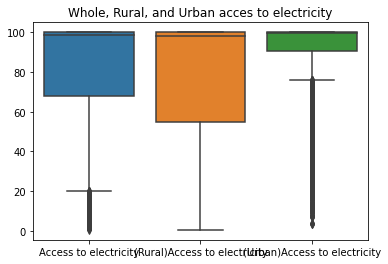

In [ ]:
sns.boxplot(data=dataset[['Access to electricity', '(Rural)Access to electricity', '(Urban)Access to electricity']]).set_title('Whole, Rural, and Urban acces to electricity')

Text(0.5, 1.0, 'Literacy and Poverty rates')

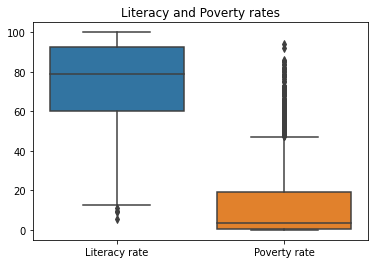

In [ ]:
sns.boxplot(data=dataset[['Literacy rate', 'Poverty rate']]).set_title('Literacy and Poverty rates')

Text(0.5, 1.0, 'Life expectancy')

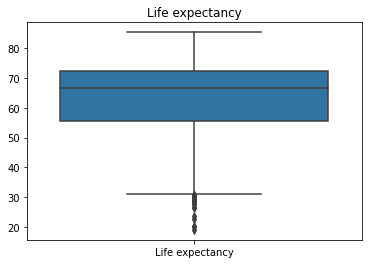

In [ ]:
sns.boxplot(data=dataset[['Life expectancy']]).set_title('Life expectancy')

Text(0.5, 1.0, 'GDP')

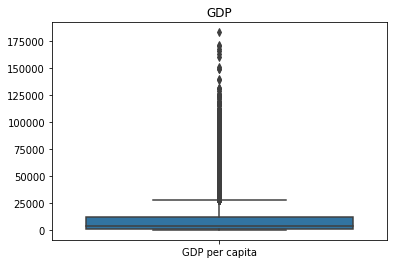

In [ ]:
sns.boxplot(data=dataset[['GDP per capita']]).set_title('GDP')

<AxesSubplot:xlabel='Year', ylabel='Access to electricity'>

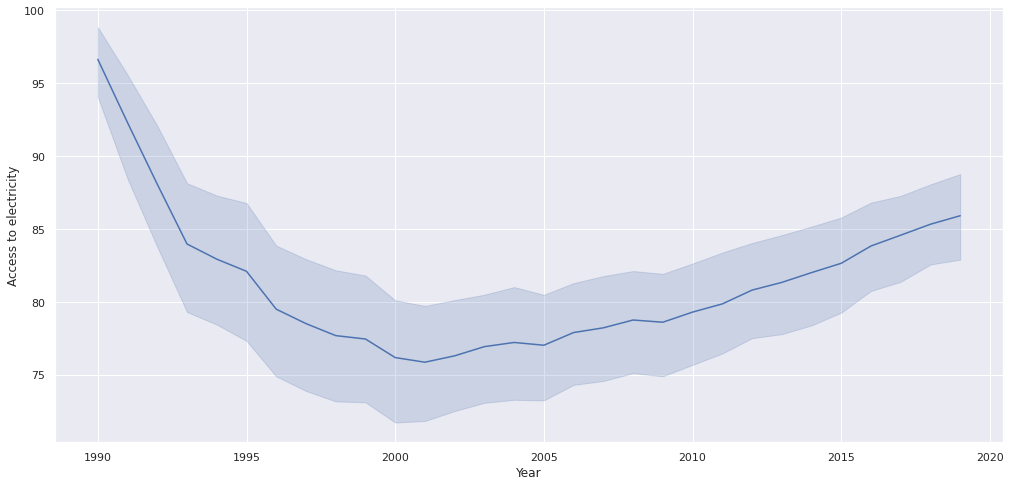

In [ ]:
sns.set(rc = {'figure.figsize':(17,8)})
sns.lineplot(x="Year", y="Access to electricity", data=dataset)

In the next section we will show how each variable behaves over the years and we expect to see a decrease in all the negative variables(poverty rate) and increase in the positive ones(Access to electricity, GDP per Capita...)

<AxesSubplot:xlabel='Year', ylabel='Literacy rate'>

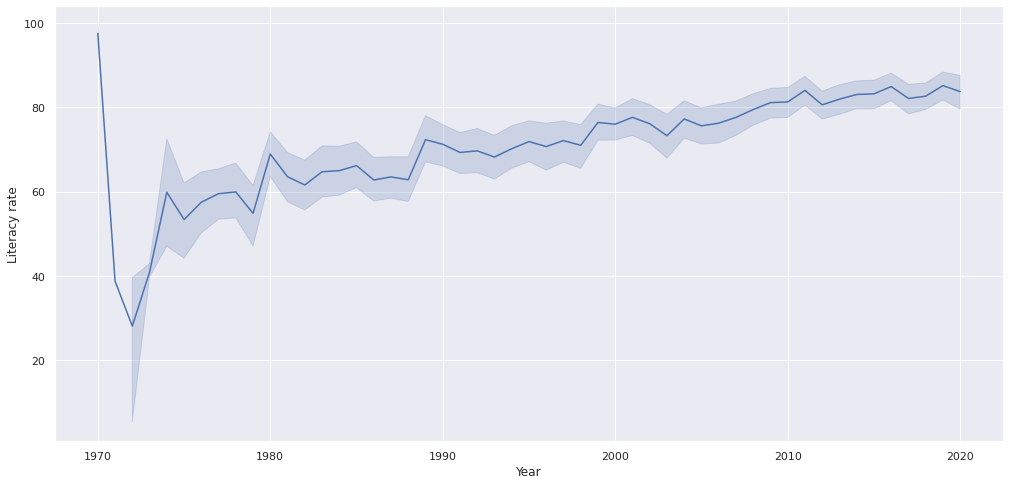

In [ ]:
sns.set(rc = {'figure.figsize':(17,8)})
sns.lineplot(x="Year", y="Literacy rate", data=dataset)

<AxesSubplot:xlabel='Year', ylabel='Poverty rate'>

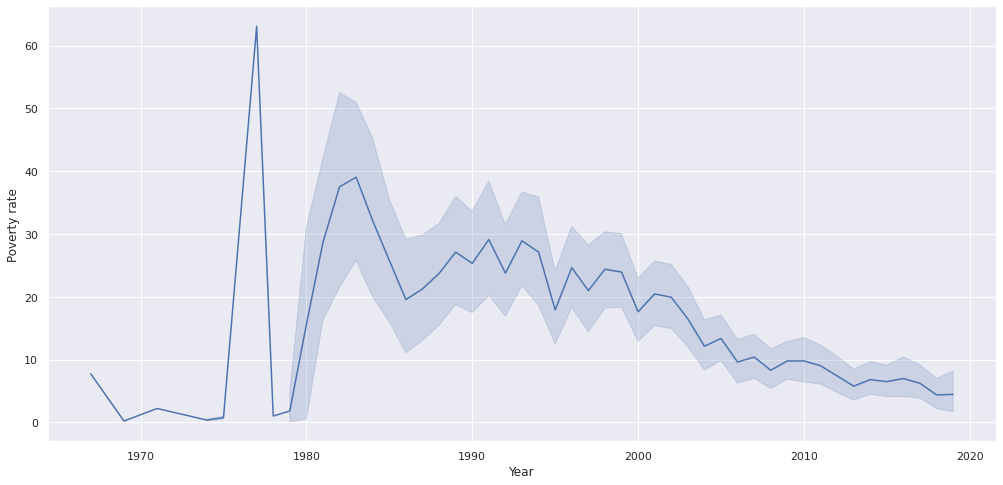

In [ ]:
sns.set(rc = {'figure.figsize':(17,8)})
sns.lineplot(x="Year", y="Poverty rate", data=dataset)

<AxesSubplot:xlabel='Year', ylabel='Life expectancy'>

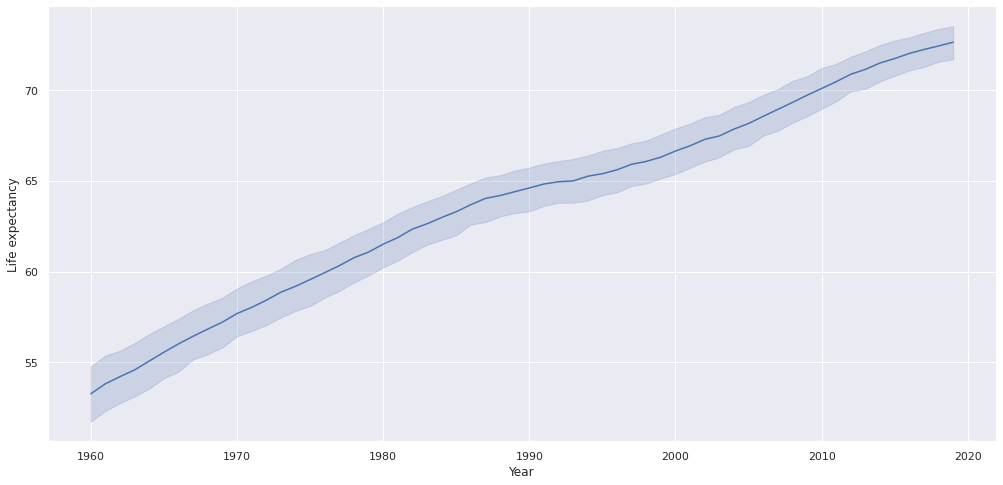

In [ ]:
sns.set(rc = {'figure.figsize':(17,8)})
sns.lineplot(x="Year", y="Life expectancy", data=dataset)

<AxesSubplot:xlabel='Year', ylabel='Electricity consumption'>

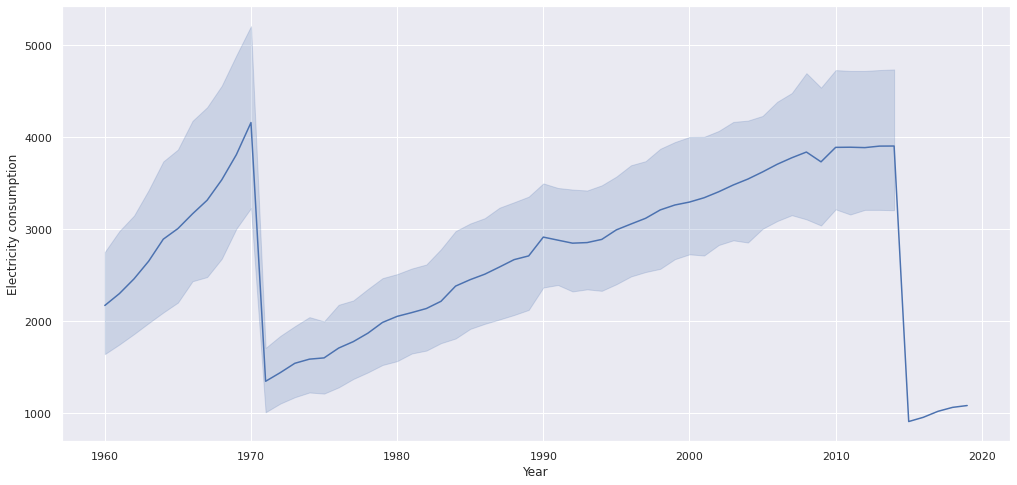

In [ ]:
sns.set(rc = {'figure.figsize':(17,8)})
sns.lineplot(x="Year", y="Electricity consumption", data=dataset)

### Handling outliers

In [ ]:
def handle_outliers(dataset):

    for index, row in dataset.iterrows():
        if (row['Access to electricity'] < 0):
            row['Access to electricity'] == np.nan
        elif(row['Access to electricity'] > 100):
            
            row['Access to electricity'] == np.nan
        
        if (row['(Rural)Access to electricity'] < 0):
            row['(Rural)Access to electricity'] == np.nan
        elif(row['(Rural)Access to electricity'] > 100):
            row['(Rural)Access to electricity'] == np.nan
        
        if (row['(Urban)Access to electricity'] < 0):
            row['(Urban)Access to electricity'] == np.nan
        elif(row['(Urban)Access to electricity'] > 100):
            row['(Urban)Access to electricity'] == np.nan
        
        if (row['Literacy rate'] < 0):
            row['Literacy rate'] == np.nan
        elif(row['Literacy rate'] > 100):
            row['Literacy rate'] == np.nan

        if (row['Poverty rate'] < 0):
            row['Poverty rate'] == np.nan
        elif(row['Poverty rate'] > 100):
            row['Poverty rate'] == np.nan

    
    return dataset
datasetOutliers = handle_outliers(dataset)
print(datasetOutliers.shape)
datasetOutliers.isna().sum()

(16226, 11)


Country Name                        0
Country Code                        0
Year                                0
Access to electricity            9471
(Rural)Access to electricity     9809
(Urban)Access to electricity     9504
Electricity consumption          8439
GDP per capita                   4141
Life expectancy                  1616
Literacy rate                   13621
Poverty rate                    14008
dtype: int64

In [ ]:
#index = dataset['Renewable electricity rate'].idxmin()
#print(dataset.loc[[index]])
# Monaco has highest GDP per capita in year 2019(183,244.61) which is plausible
# Myanmar in the 1967. has the lowest(124.275513) which is correct.
# lowest life expectancy is in Cambodia in the year 1977 during the cambodian genocide
# highest life expectancy - San Marino 2012(85.417) years
# country with lowest ever literacy rate is somalia, in 1990 it was 24%
# the earlier data(for Somalia) is estimated by UN and the lowest gives us little over 5% in 1972.

If boxplotted the dataset will show clusters of outliers, but after checking the data appears to be correct and the outliers occur for countries with highest i.e. GDP per capita(Monaco, Luxembourg, Liechtenstein).

The decision is to leave those numbers in the dataset because they represent a value which is an indicator of access to electricity(i.e. in times when a country has the highest GDP per capita in the world their access to electricity is 100%)

Other variables which are represented as rates is checked if there are any values outside of the range(0-100) and they are set to nan and later removed.

## Handling missing values

### Exploring missing values

First thing is looking how many missing values does each attributes have. Then after it, we will remove rows that have missing value for attribute Access&nbsp;to&nbsp;electricity because we have to predict and make models depending on it.

In [ ]:
data3 = merge_all()
#print(data3.isna().sum())
data3 = data3.dropna(subset=['Access to electricity'])

Now we will see the distribution of values for Electricity&nbsp;consumption per year.

<AxesSubplot:xlabel='Year', ylabel='Electricity consumption'>

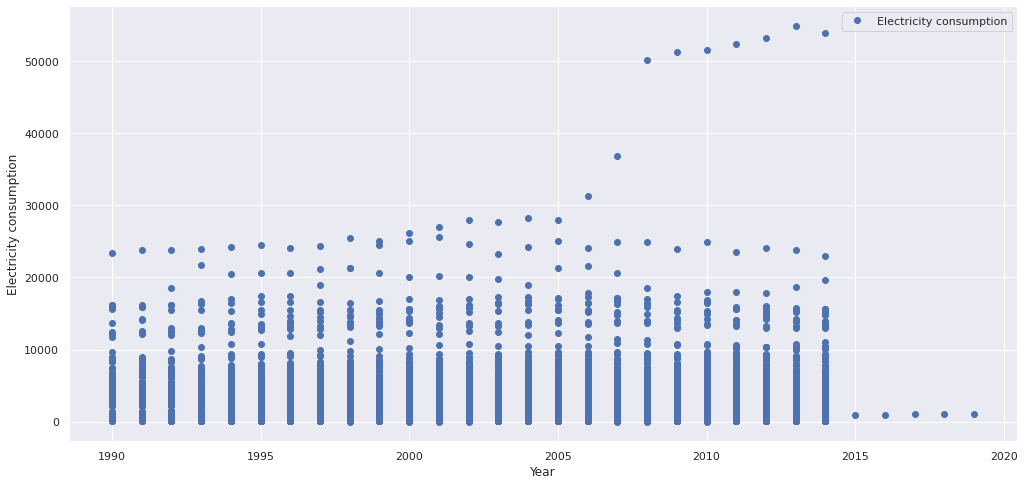

In [ ]:
data3.plot(x='Year', y='Electricity consumption', style='o', ylabel="Electricity consumption")

From this graph we can see that there is a very small number of values for attribute Electric consumption after 2014. Regarding attribute Electric consumption we will explore the number of missing values for each year and perhaps remove some years.

In [ ]:
mis = pd.DataFrame()
years=[]
missin=[]
a=1990
data3["Year"] = pd.to_numeric(data3["Year"])
for i in range(30):
    #print(a+i)
    #print(ai+i, data3[data3['Year']== str(a+i)].isnull().sum(axis=1).sum())
   # print(a+i, data3[data3['Year']== a+i].isnull().sum(axis=1).sum())
    years.append(a+i)
    missin.append(data3[data3['Year']== a+i].isnull().sum(axis=1).sum())
mis = pd.DataFrame({'Years': years, 'number': missin})
#display(mis)
#print(years)
#print(missin)
#data3 = data3.dropna(subset=['Year']> 2014)
#data3.drop(data3[data3['Year'] > 2014].index, inplace = True)
#print(data3.shape)
#print(data3.isna().sum())

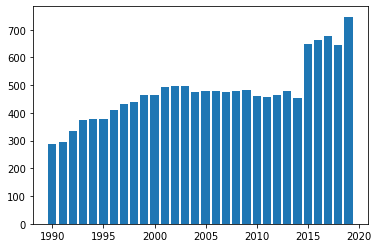

In [ ]:
x= mis['Years']
y= mis['number']
plt.bar(x, y)
plt.show()

After exploring number of missing values per Year, we were thinking about removing some because there is a significant difference in number of missing values before and after year 2014. We decided not to do it because we will remove to much important data. We will try to fill those missing values with appropriate ones. Now we are going to see number of missing data for each country.

264


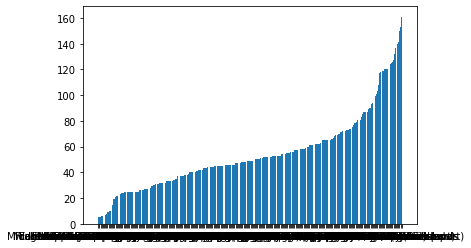

In [ ]:
uniqueValues = data3['Country Name'].unique()
print(len(uniqueValues))
miss = pd.DataFrame()
country=[]
num=[]

rows_count = len(uniqueValues)
cols_count = 2
list = [[0 for j in range(cols_count)] for i in range(rows_count)]

for i in range(len(uniqueValues)):
    country.append(uniqueValues[i])
    num.append(data3[data3['Country Name']== uniqueValues[i]].isnull().sum(axis=1).sum())
    list[i][0]= uniqueValues[i]
    list[i][1]= data3[data3['Country Name']== uniqueValues[i]].isnull().sum(axis=1).sum()
    #print("Number %s is %s  ", uniqueValues[i], data3[data3['Country Name']== uniqueValues[i]].isnull().sum(axis=1).sum())
#print(list)
sorted_multi_list = sorted(list, key=lambda x: x[1], reverse=True)
#print(sorted_multi_list)
miss = pd.DataFrame({'Years': country, 'number': num})
miss =miss.sort_values(by=['number'])
#display(miss)
x= miss['Years']
y= miss['number']
ax=plt.bar(x, y)
plt.show()

for i in range(len(sorted_multi_list)):
    if (sorted_multi_list[i][1]> 65):
        #print(sorted_multi_list[i][0])
        data3.drop(data3[data3['Country Name']== sorted_multi_list[i][0]].index, inplace = True)

#print(data3.shape)
#print(data3.isna().sum())

In our dataset, for every country there are values for years from 1990. For every coutry per year there are 7 possible null values. So maksimum number of null values for each country is 7*(2019-1990+1)= 210. We made a list of countries with number of missing values and we sorted it by this number. After looking into this countries and removing them from dataset, we decided to get rid of ones that have more than 65 missing values.

Here, we were looking for rows that contain more than 3 missing values. We manually explored them and their countries. Beacuse number of this rows is small, we decided to remove them.

In [ ]:
#dataTest = data3.drop(data3.loc[data3.isnull().sum(axis=1) > 3], axis=1)
indexes = data3.loc[data3.isnull().sum(axis=1) > 3].index
data3 = data3[~data3.index.isin(indexes)]

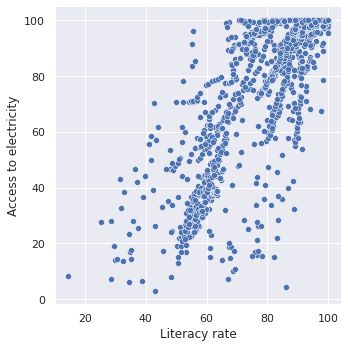

In [ ]:
sns.relplot(x="Literacy rate", y="Access to electricity", data=data3);

<AxesSubplot:>

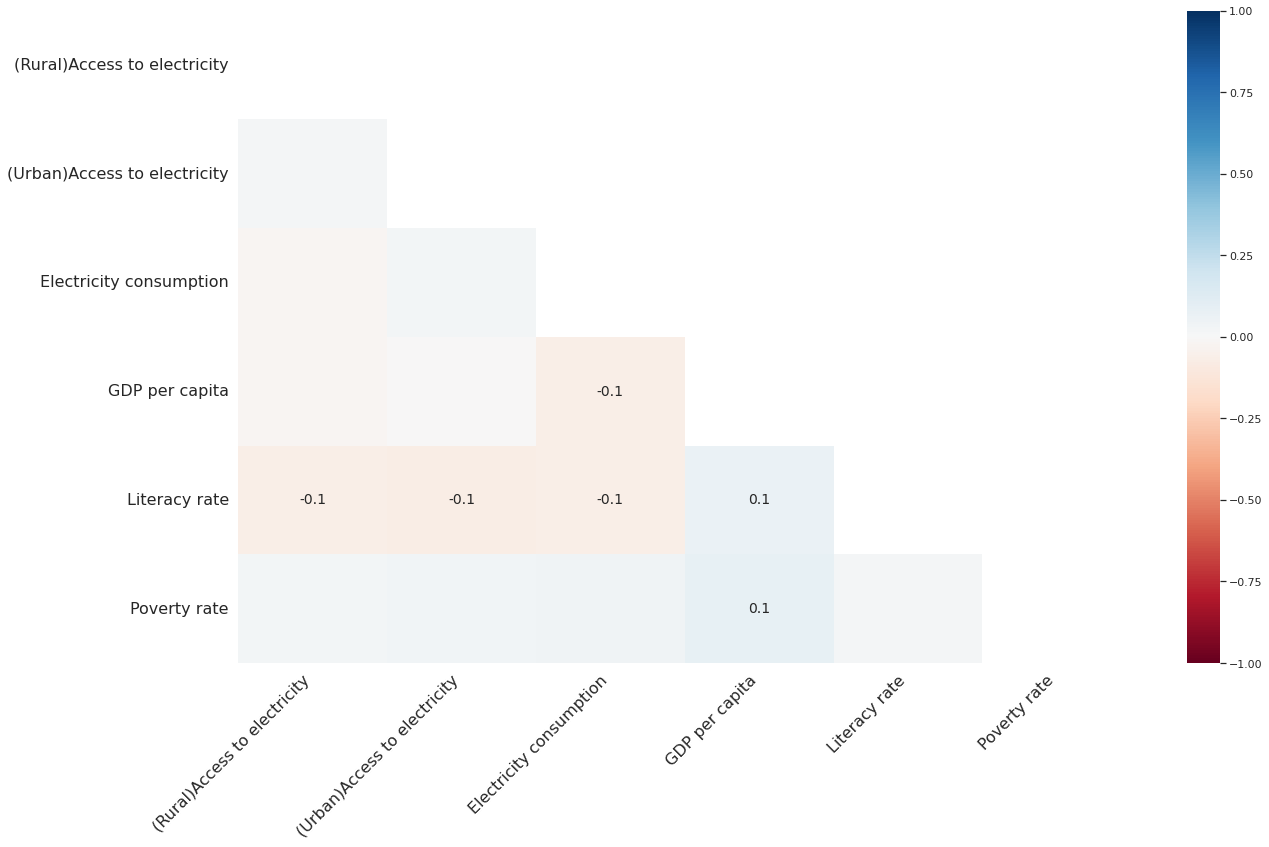

In [ ]:
import missingno as msno

msno.heatmap(data3)

This graph shows correlation between missing values.

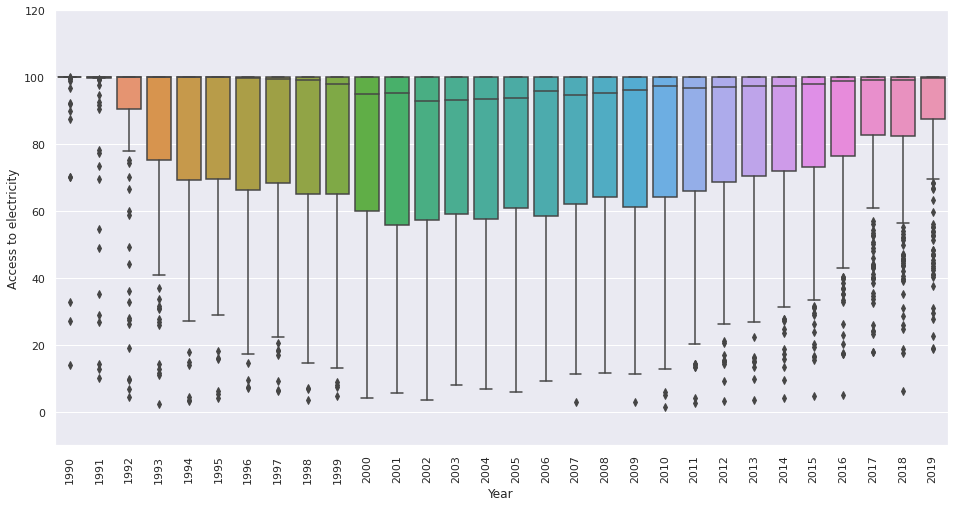

In [ ]:
var = 'Year'
data = pd.concat([data3['Access to electricity'], data3[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Access to electricity", data=data)
fig.axis(ymin=-10, ymax=120);
plt.xticks(rotation=90);

This graph shows us the distribution of Access to electricity variable over the years. Here we can see that from 1990-2000 access was going down. This makes no sense without an explanation. Explanation is that our data set before 2000 was missing a lot of data for certain countries. Most of that data was for Third World countries and that is why when we started to get that data, access to electricity seemingly decreased.

There are a few missing values for attribute (Urban) Access to electricity so we explored in which countries and found&nbsp;that&nbsp;country&nbsp;Arab&nbsp;World has missing&nbsp;values for this attribute in years from 1996 to 2000 and  Caribbean&nbsp;small&nbsp;states for years from 1993 to 1999. We decided to replace null values of a country with mean value of '(Urban) Access to electricity' of that exact country.

In [ ]:
mean = data3['(Urban)Access to electricity'][data3['Country Name'] == 'Arab World'].mean()
mean2 = data3['(Urban)Access to electricity'][data3['Country Name'] == 'Caribbean small states'].mean()
#print(mean)
#print(mean2)
mask = (data3['Country Name']=='Arab World')
data3.loc[mask, '(Urban)Access to electricity'] = data3.loc[mask, '(Urban)Access to electricity'].fillna(mean)

mask2 = (data3['Country Code']=='CSS')
data3.loc[mask2, '(Urban)Access to electricity'] = data3.loc[mask2, '(Urban)Access to electricity'].fillna(mean2)

#display(data3[data3['Country Name'] == 'Arab World'])
#display(data3[data3['Country Code'] == 'CSS'])

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
data3 = data3.reset_index(drop=True)
value = data3.iloc[932]['(Urban)Access to electricity']
data3.loc[799, "(Urban)Access to electricity"] = value
#display(data3[data3['Country Name'] == 'Pre-demographic dividend'])

Now we are going to make a function which replaces missing value with next possible value for same attribute and country.  If there is missing data in the last few rows we are going to change those values with previous ones. We think this is the best option for replacing missing data because of possible linear flow of values.

In [ ]:
def replace_with_next(data3, attribute):
    #display(data3[data3[attribute].isnull()])
    lista = data3[data3[attribute].isnull()].index
    #print(lista)
    #lista je lista indexa koji za GDP per captia imaju Nan


    for j in range(len(lista)):
    #for j in range(2):
        lista_te_drzave = data3[data3['Country Name'] == data3['Country Name'][lista[j]]].index
        index_null= data3[data3['Country Name'] == data3['Country Name'][lista[j]]][data3[attribute].isnull()].index
        #print(lista_te_drzave)
        # print(index_null)
        #print(len(lista_te_drzave))
            #print(data3['Country Name'][lista[j]])
        for i in range(len(lista_te_drzave)-1,-1,-1):
                for k in range(len(index_null)-1,-1,-1):
                    if index_null[k] == lista_te_drzave[i] and i!=len(lista_te_drzave)-1:
                        data3[attribute][lista_te_drzave[i]] = data3[attribute][lista_te_drzave[i+1]]
        for i in range(0,len(lista_te_drzave),1):
                for k in range(0,len(index_null),1):
                    if index_null[k] == lista_te_drzave[i]:
                        data3[attribute][lista_te_drzave[i]] = data3[attribute][lista_te_drzave[i-1]] 

replace_with_next(data3, 'GDP per capita')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


This function replaces missing value GDP per capita for every country with next existing value for same country.

In [ ]:
print(data3['Country Name'][data3['GDP per capita'].isnull()].unique())

['Syrian Arab Republic' "Korea, Dem. People's Rep."]


After calling replace_with_next function, we found that country Syrian&nbsp;Arab&nbsp;Republic has no values for GDP per capita, also it has no values for Literacy rate and Poverty rate so we decided to remove this country from our dataset. Same is with country Korea, Dem. People's Rep.

In [ ]:
#display(data3.loc[[11399]])
#display(data3[data3['Country Name'] == 'Syrian Arab Republic'])
data3.drop(data3[data3['Country Name']== 'Syrian Arab Republic'].index, inplace = True)

#display(data3.loc[[13227]])
#display(data3[data3['Country Code'] == 'PRK'])
data3.drop(data3[data3['Country Code']== 'PRK'].index, inplace = True)

Now, we are going to call replace_with_next function for attribute (Rural)Access&nbsp;to&nbsp;electricity.

In [ ]:
replace_with_next(data3, '(Rural)Access to electricity')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


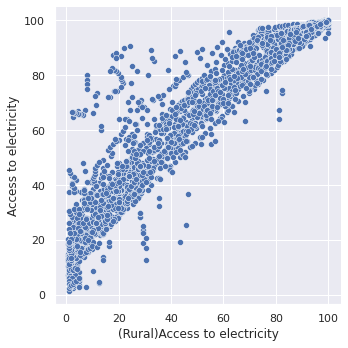

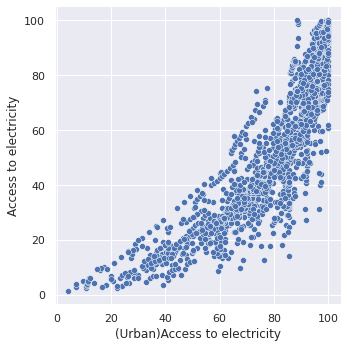

In [ ]:
sns.relplot(x="(Rural)Access to electricity", y="Access to electricity", data=data3);
sns.relplot(x="(Urban)Access to electricity", y="Access to electricity", data=data3);


In [ ]:
print(data3.isna().sum())

Country Name                       0
Country Code                       0
Year                               0
Access to electricity              0
(Rural)Access to electricity       0
(Urban)Access to electricity       0
Electricity consumption         1286
GDP per capita                     0
Life expectancy                    0
Literacy rate                   3395
Poverty rate                    3224
dtype: int64


### Removing missing values

In [ ]:
from verstack import NaNImputer

def remove_nan(dataOutliers):
    #removing rows that have missing value for attribute Access to electricity
    dataOutliers = dataOutliers.dropna(subset=['Access to electricity'])

    #removing countries that have more than 65 missing values
    uniqueValues = dataOutliers['Country Name'].unique()
    rows_count = len(uniqueValues)
    cols_count = 2
    list = [[0 for j in range(cols_count)] for i in range(rows_count)]

    for i in range(len(uniqueValues)):
        list[i][0]= uniqueValues[i]
        list[i][1]= dataOutliers[dataOutliers['Country Name']== uniqueValues[i]].isnull().sum(axis=1).sum()
    sorted_multi_list = sorted(list, key=lambda x: x[1], reverse=True)
    for i in range(len(sorted_multi_list)):
        if (sorted_multi_list[i][1]> 65):
            dataOutliers.drop(dataOutliers[dataOutliers['Country Name']== sorted_multi_list[i][0]].index, inplace = True)

    #removing rows with more than 3 missing values
    indexes = dataOutliers.loc[dataOutliers.isnull().sum(axis=1) > 3].index
    dataOutliers = dataOutliers[~dataOutliers.index.isin(indexes)]

    #replacing null values of a country with mean value of '(Urban) Access to electricity' 
    #of that exact country
    mean = dataOutliers['(Urban)Access to electricity'][dataOutliers['Country Name'] == 'Arab World'].mean()
    mean2 = dataOutliers['(Urban)Access to electricity'][dataOutliers['Country Name'] == 'Caribbean small states'].mean()
    mask = (dataOutliers['Country Name']=='Arab World')
    dataOutliers.loc[mask, '(Urban)Access to electricity'] = dataOutliers.loc[mask, '(Urban)Access to electricity'].fillna(mean)
    mask2 = (dataOutliers['Country Code']=='CSS')
    dataOutliers.loc[mask2, '(Urban)Access to electricity'] = dataOutliers.loc[mask2, '(Urban)Access to electricity'].fillna(mean2)

    data3 = dataOutliers.reset_index(drop=True)
    value = dataOutliers.iloc[932]['(Urban)Access to electricity']
    dataOutliers.loc[799, "(Urban)Access to electricity"] = value

    #replace missing value with next possible value for same attribute and country
    replace_with_next(dataOutliers, 'GDP per capita')
    
    dataOutliers.drop(dataOutliers[dataOutliers['Country Name']== 'Syrian Arab Republic'].index, inplace = True)
    dataOutliers.drop(dataOutliers[dataOutliers['Country Code']== 'PRK'].index, inplace = True)

    #replace missing value with next possible value for same attribute and country
    replace_with_next(dataOutliers, '(Rural)Access to electricity')
    
    dataOutliers = dataOutliers.reset_index(drop=True)

    dataOutliers['Year'] = pd.to_numeric(dataOutliers['Year'])
    dataOutliers = dataOutliers[dataOutliers.Year > 2000]
    
    #Electricity consumption has most of its values missing from 2014 onwards.
    #Thats why we tought this would be a good case to predict them.
    imputer = NaNImputer(nan_cols = ['Electricity consumption'], verbose=False)
    dataOutliers = imputer.impute(dataOutliers)

    return dataOutliers


datasetNaN = remove_nan(datasetOutliers)
print(datasetNaN.shape)
print(datasetNaN.isna().sum())
datasetNaN.head()

NaNImputer(conservative = False, n_feats = 10,            
           fix_string_nans = True, verbose = False,                
           multiprocessing_load = 3, fill_nans_in_pure_text = True,                    
           drop_empty_cols = True, drop_nan_cols_with_constant = True                        
           feature_selection = correlation)

Deploy multiprocessing with 2 parallel proceses

(3688, 11)
Country Name                       0
Country Code                       0
Year                               0
Access to electricity              0
(Rural)Access to electricity       0
(Urban)Access to electricity       0
Electricity consumption            0
GDP per capita                     0
Life expectancy                    0
Literacy rate                   2351
Poverty rate                    2226
dtype: int64


,Country Name,Country Code,Year,Access to electricity,(Rural)Access to electricity,(Urban)Access to electricity,Electricity consumption,GDP per capita,Life expectancy,Literacy rate,Poverty rate
1284,Africa Eastern and Southern,AFE,2001.0,23.103178,13.201875,54.770123,743.916044,1160.964083,51.606458,NaN,NaN
1285,Africa Western and Central,AFW,2001.0,35.664311,16.029894,73.819469,119.051133,1217.817591,49.475136,NaN,NaN
1286,Angola,AGO,2001.0,20.000000,9.477077,30.000000,82.616571,2471.664627,47.059000,67.405418,NaN
1287,Albania,ALB,2001.0,100.000000,100.000000,100.000000,1351.230796,2143.653801,74.288000,98.712982,NaN
1288,Arab World,ARB,2001.0,79.559139,64.168534,94.591482,1581.590402,4681.965157,68.072519,64.877777,NaN


Now the only problem that is left is to deal with the missing literacy and poverty rates data.

In [ ]:
def find_similar_country(datasetNaN):
    nonan = datasetNaN[~datasetNaN.isnull().any(axis=1)]   #Countries with no NaN values at all
    litpov = datasetNaN[(datasetNaN['Poverty rate'].isnull()) & (datasetNaN['Literacy rate'].isnull())] # countries with both nans
    lit = datasetNaN[~datasetNaN['Poverty rate'].isna()]
    lit = lit[lit['Literacy rate'].isna()]  #Countries with poverty, but no literacy rate
    pov = datasetNaN[~datasetNaN['Literacy rate'].isna()]
    pov = pov[pov['Poverty rate'].isna()]  #Countries with literacy, but no poverty rate


    distances = np.array(cdist(lit.iloc[:,[3, 4, 5, 6, 7, 8, 10]], nonan.iloc[:,[3, 4, 5, 6, 7, 8, 10]], metric='euclidean'))
    indexes = np.argmin(distances, axis=1)
    values = nonan.iloc[indexes]['Literacy rate'].values
    lit['Literacy rate'] = values

    distances = np.array(cdist(pov.iloc[:,[3, 4, 5, 6, 7, 8, 9]], nonan.iloc[:,[3, 4, 5, 6, 7, 8, 9]], metric='euclidean'))
    indexes = np.argmin(distances, axis=1)
    values1 = nonan.iloc[indexes]['Poverty rate'].values
    pov['Poverty rate'] = values1

    distances = np.array(cdist(litpov.iloc[:,[3, 4, 5, 6, 7, 8]], nonan.iloc[:,[3, 4, 5, 6, 7, 8]], metric='euclidean'))
    indexes = np.argmin(distances, axis=1)
    values1 = nonan.iloc[indexes]['Literacy rate'].values
    litpov['Literacy rate'] = values1

    distances = np.array(cdist(litpov.iloc[:,[3, 4, 5, 6, 7, 8, 9]], nonan.iloc[:,[3, 4, 5, 6, 7, 8, 9]], metric='euclidean'))
    indexes = np.argmin(distances, axis=1)
    values1 = nonan.iloc[indexes]['Poverty rate'].values
    litpov['Poverty rate'] = values1
    pdList = [lit, pov, litpov]  # List of your dataframes
    filled_values = pd.concat(pdList)
    return filled_values

readyData = find_similar_country(datasetNaN)
print(readyData.isnull().sum())
print(readyData.shape)
#readyData.to_csv('readyData')
readyData.head()


Country Name                    0
Country Code                    0
Year                            0
Access to electricity           0
(Rural)Access to electricity    0
(Urban)Access to electricity    0
Electricity consumption         0
GDP per capita                  0
Life expectancy                 0
Literacy rate                   0
Poverty rate                    0
dtype: int64
(3175, 11)


,Country Name,Country Code,Year,Access to electricity,(Rural)Access to electricity,(Urban)Access to electricity,Electricity consumption,GDP per capita,Life expectancy,Literacy rate,Poverty rate
1292,Australia,AUS,2001.0,100.000000,100.000000,100.000000,10636.377685,45941.735383,79.634146,98.848282,0.7
1294,Azerbaijan,AZE,2001.0,98.623421,97.624132,99.561226,2106.470066,1640.878987,67.054000,99.652351,2.6
1300,Bosnia and Herzegovina,BIH,2001.0,99.400000,100.000000,100.000000,2068.425254,2776.713174,74.637000,99.359894,0.3
1301,Belarus,BLR,2001.0,100.000000,100.000000,100.000000,3009.402482,2754.664470,68.507317,99.974350,3.2
1303,Brazil,BRA,2001.0,96.016528,81.875763,99.215119,1747.939631,6788.585548,70.462000,90.004669,11.5


To solve this we split the data into 2 groups - one which contains only the missing values and one that has all columns filled.
The idea was to find a similar country to the one which has missing values and then fill the missing values with values from a country which is 
most similar to it.

Firstly, our idea was good but the approach to solving the problem was wrong because of the many costly functions(mostly loc/iloc in loops) which resulted in a rather long runtime(~10 minutes) 
After some research about the better alternatives we opted for vectorization.

Therefore we calculated the distances and put the results in a numpy array(which is supposedly the fastest) from which we would take the smallest distance from each row and and this resulted in a list of indexes of the values.
After that it only took one calling of pandas.iloc() to fill the entire column

In the end the runtime was a little over one second.

## Data exploration and visualization

In [ ]:
data = pd.read_csv('readyData.csv')
data.head()

,Unnamed: 0,Country Name,Country Code,Year,Access to electricity,(Rural)Access to electricity,(Urban)Access to electricity,Electricity consumption,GDP per capita,Life expectancy,Literacy rate,Poverty rate
0,1292,Australia,AUS,2001.0,100.000000,100.000000,100.000000,10636.377685,45941.735383,79.634146,98.848282,0.7
1,1294,Azerbaijan,AZE,2001.0,98.623421,97.624132,99.561226,2106.470066,1640.878987,67.054000,99.585999,2.6
2,1300,Bosnia and Herzegovina,BIH,2001.0,99.400000,100.000000,100.000000,2068.425254,2776.713174,74.637000,99.359894,0.3
3,1301,Belarus,BLR,2001.0,100.000000,100.000000,100.000000,3009.402482,2754.664470,68.507317,99.974350,3.2
4,1303,Brazil,BRA,2001.0,96.016528,81.875763,99.215119,1747.939631,6788.585548,70.462000,90.004669,11.5


In the first plot we explore differences between Access to electricity between rural, urban and combined. We can see that through time they all change pretty much the same with a steady increase. Like it should be rural is lower, urban is higher and combined is in the middle.

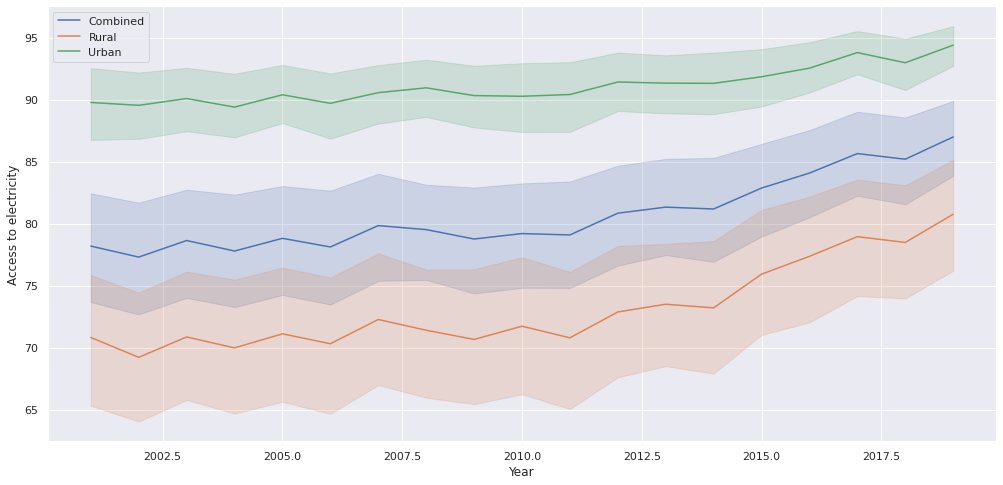

In [ ]:
sns.set(rc = {'figure.figsize':(17,8)})
sns.lineplot(x="Year", y="Access to electricity", data=data, label='Combined')
sns.lineplot(x="Year", y="(Rural)Access to electricity", data=data, label='Rural')
sns.lineplot(x="Year", y="(Urban)Access to electricity", data=data, label = 'Urban')
plt.legend()

Next graphs show how our other metrics change through time. It all seems like it should be with Literacy rate, Life expectancy, Electricity consumption and GDP per capita going up and Poverty rate going down.

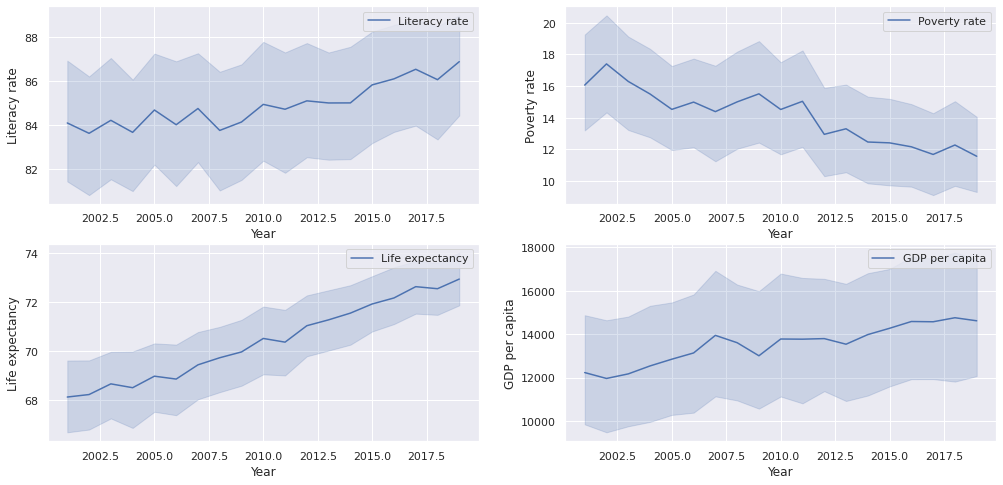

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.lineplot(x="Year", y="Literacy rate", data=data, label='Literacy rate', ax=axs[0,0])
sns.lineplot(x="Year", y="Poverty rate", data=data, label='Poverty rate', ax=axs[0,1])
sns.lineplot(x="Year", y="Life expectancy", data=data, label='Life expectancy', ax=axs[1,0])
sns.lineplot(x="Year", y="GDP per capita", data=data, label='GDP per capita', ax=axs[1,1])
plt.legend()

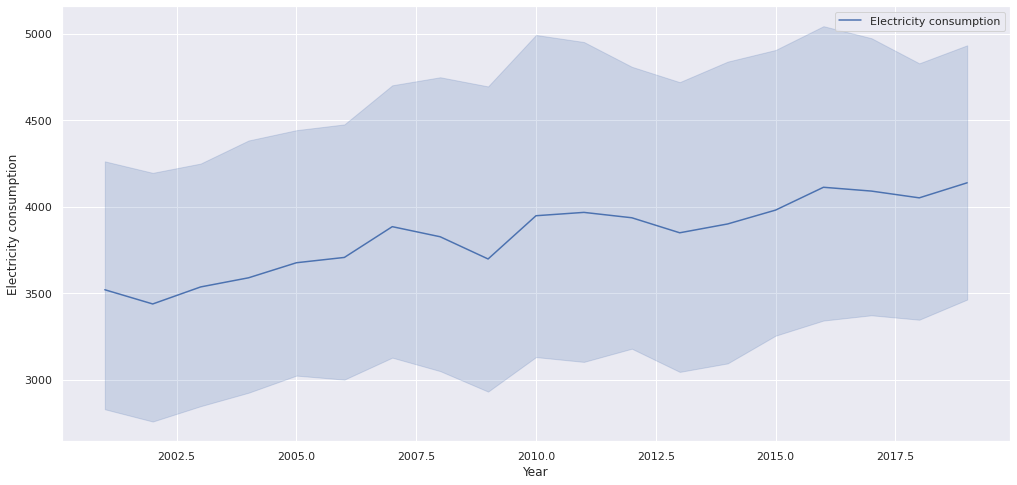

In [ ]:
sns.lineplot(x="Year", y="Electricity consumption", data=data, label='Electricity consumption')
plt.legend()

Next we have a correlation matrix to show to show relations between all the variables.

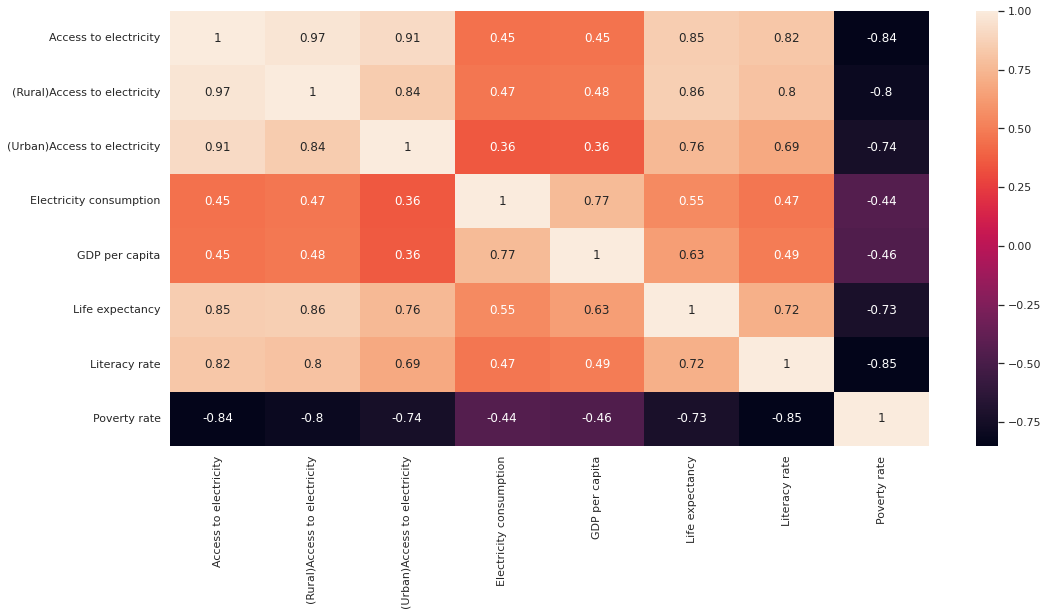

In [ ]:
corr = sns.heatmap(data.drop(['Unnamed: 0', 'Year'], axis=1).corr(),annot=True)

Now we try to show how access to electricity changes over the years in different countries. We are going to present that on the world map.

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

table1980 = dataset.query("1900 < Year <= 1990")
table1990 = dataset.query("1990 < Year <= 2000")
table2000 = dataset.query("2000 < Year <= 2005") 
table2005 = dataset.query("2005 < Year <= 2010")
table2010 = dataset.query("2010 < Year <= 2015")
table2015 = dataset.query("2015 < Year <= 2020")

table1980 = table1980.groupby(['Country Code'])['Access to electricity'].mean()
table1980 = world.merge(table1980, how="left", left_on=['iso_a3'], right_on=['Country Code'])

table1990 = table1990.groupby(['Country Code'])['Access to electricity'].mean()
table1990 = world.merge(table1990, how="left", left_on=['iso_a3'], right_on=['Country Code'])

table2000 = table2000.groupby(['Country Code'])['Access to electricity'].mean()
table2000 = world.merge(table2000, how="left", left_on=['iso_a3'], right_on=['Country Code'])

table2005 = table2005.groupby(['Country Code'])['Access to electricity'].mean()
table2005 = world.merge(table2005, how="left", left_on=['iso_a3'], right_on=['Country Code'])

table2010 = table2010.groupby(['Country Code'])['Access to electricity'].mean()
table2010 = world.merge(table2010, how="left", left_on=['iso_a3'], right_on=['Country Code'])

table2015 = table2015.groupby(['Country Code'])['Access to electricity'].mean()
table2015 = world.merge(table2015, how="left", left_on=['iso_a3'], right_on=['Country Code'])

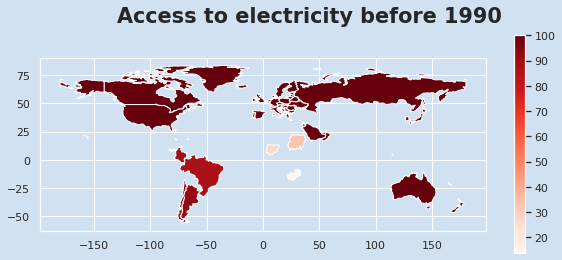

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), facecolor = plt.cm.Blues(.2))

fig.suptitle('Access to electricity before 1990',
             fontsize = 'xx-large',  
             fontweight = 'bold')
ax.set_facecolor(plt.cm.Blues(.2))
table1980.plot(column = 'Access to electricity',
           cmap = 'Reds',
           ax = ax,
           legend = True)

plt.show()

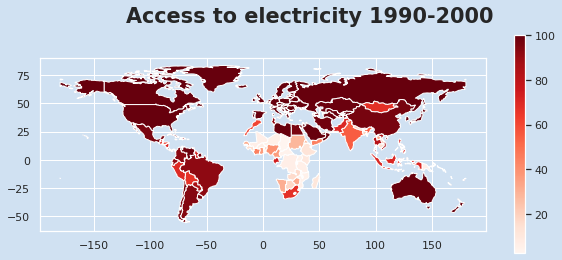

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), facecolor = plt.cm.Blues(.2))

fig.suptitle('Access to electricity 1990-2000',
             fontsize = 'xx-large',  
             fontweight = 'bold')
ax.set_facecolor(plt.cm.Blues(.2))
table1990.plot(column = 'Access to electricity',
           cmap = 'Reds',
           ax = ax,
           legend = True)

plt.show()

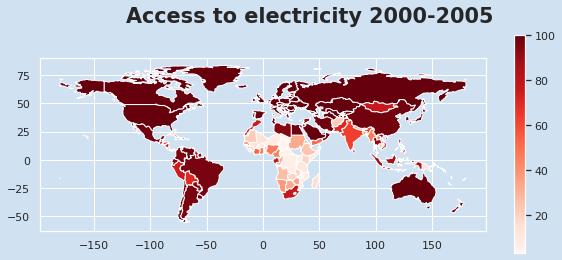

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), facecolor = plt.cm.Blues(.2))

fig.suptitle('Access to electricity 2000-2005',
             fontsize = 'xx-large',  
             fontweight = 'bold')
ax.set_facecolor(plt.cm.Blues(.2))
table2000.plot(column = 'Access to electricity',
           cmap = 'Reds',
           ax = ax,
           legend = True)

plt.show()

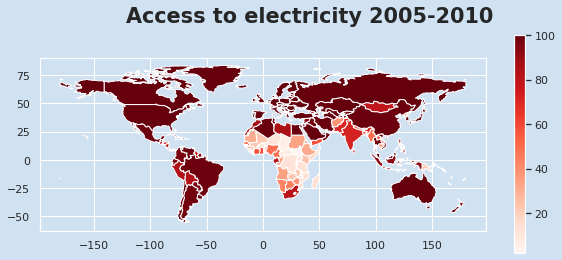

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), facecolor = plt.cm.Blues(.2))
fig.suptitle('Access to electricity 2005-2010',
             fontsize = 'xx-large',  
             fontweight = 'bold')
ax.set_facecolor(plt.cm.Blues(.2))
table2005.plot(column = 'Access to electricity',
           cmap = 'Reds',
           ax = ax,
           legend = True)
plt.show()

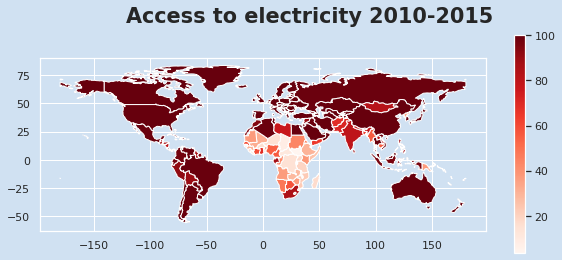

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), facecolor = plt.cm.Blues(.2))
fig.suptitle('Access to electricity 2010-2015',
             fontsize = 'xx-large',  
             fontweight = 'bold')
ax.set_facecolor(plt.cm.Blues(.2))
table2010.plot(column = 'Access to electricity',
           cmap = 'Reds',
           ax = ax,
           legend = True)
plt.show()

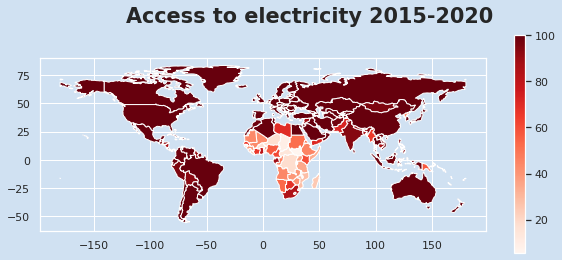

In [ ]:
fig, ax = plt.subplots(figsize = (10,4), facecolor = plt.cm.Blues(.2))
fig.suptitle('Access to electricity 2015-2020',
             fontsize = 'xx-large',  
             fontweight = 'bold')
ax.set_facecolor(plt.cm.Blues(.2))
table2015.plot(column = 'Access to electricity',
           cmap = 'Reds',
           ax = ax,
           legend = True)
plt.show()

In [ ]:
dataForModel = data.drop(['Unnamed: 0', 'Country Name', 'Country Code', '(Rural)Access to electricity', '(Urban)Access to electricity'], axis=1)
dataForModel

,Year,Access to electricity,Electricity consumption,GDP per capita,Life expectancy,Literacy rate,Poverty rate
0,2001.0,100.000000,10636.377685,45941.735383,79.634146,98.848282,0.7
1,2001.0,98.623421,2106.470066,1640.878987,67.054000,99.585999,2.6
2,2001.0,99.400000,2068.425254,2776.713174,74.637000,99.359894,0.3
3,2001.0,100.000000,3009.402482,2754.664470,68.507317,99.974350,3.2
4,2001.0,96.016528,1747.939631,6788.585548,70.462000,90.004669,11.5
...,...,...,...,...,...,...,...
3170,2019.0,100.000000,6937.360840,16192.323498,73.507000,99.885788,1.0
3171,2019.0,100.000000,2997.918457,3951.799039,76.699000,89.137917,1.3
3172,2019.0,37.700000,244.275345,985.448208,65.456000,58.211849,42.5
3173,2019.0,100.000000,14173.855469,60836.771454,78.787805,98.848282,1.2


### Model building

In this section we try to build our model with a library called Pycarret.

In [ ]:
from pycaret.regression import *

exp_reg101 = setup(data = dataForModel, target = 'Access to electricity', use_gpu=True, silent=True)

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.0.1. Support for newer scikit-learn versions will be added in a future release.

Here we tryout different models to see which one is the best one.

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.5142,25.1585,4.9838,0.9653,0.1432,0.0798,1.3160
rf,Random Forest Regressor,2.9033,31.9604,5.6054,0.9561,0.1574,0.0916,1.6860
lightgbm,Light Gradient Boosting Machine,3.1816,33.8541,5.7773,0.9536,0.1598,0.0953,0.1180
gbr,Gradient Boosting Regressor,3.7779,43.8275,6.5901,0.9397,0.1766,0.1099,0.4180
dt,Decision Tree Regressor,3.3399,58.9679,7.6385,0.9192,0.2119,0.1136,0.0240
ada,AdaBoost Regressor,8.3919,94.4796,9.7110,0.8697,0.2247,0.1802,0.2310
lar,Least Angle Regression,7.3183,100.9099,10.0228,0.8613,0.2470,0.1737,0.0160
br,Bayesian Ridge,7.3152,100.9111,10.0229,0.8613,0.2472,0.1738,0.0190
ridge,Ridge Regression,7.3183,100.9099,10.0228,0.8613,0.2470,0.1737,0.0130
lr,Linear Regression,7.3183,100.9099,10.0228,0.8613,0.2470,0.1737,0.0130


Extra trees regressor turned out to be the best one for our data. Next step is tuning our model with parameter optimization. We did that using randomized grid search with a predefined grid. 

In [ ]:
et = create_model('et')
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.7014,38.7310,6.2234,0.9491,0.1451,0.0841
1,3.8931,44.7810,6.6919,0.9341,0.1503,0.0840
2,3.5774,39.1019,6.2532,0.9470,0.1493,0.0835
3,2.6486,22.1785,4.7094,0.9669,0.1701,0.0899
4,4.2109,50.5480,7.1097,0.9335,0.1817,0.1055
5,4.5412,55.8369,7.4724,0.9369,0.2604,0.1824
6,3.3574,34.4633,5.8705,0.9543,0.1676,0.0917
7,3.5233,32.3845,5.6907,0.9526,0.1144,0.0654
8,3.7448,42.5399,6.5223,0.9463,0.2766,0.2514
9,3.9087,47.7411,6.9095,0.9190,0.1512,0.0758


Here we have a residual plot for our model.

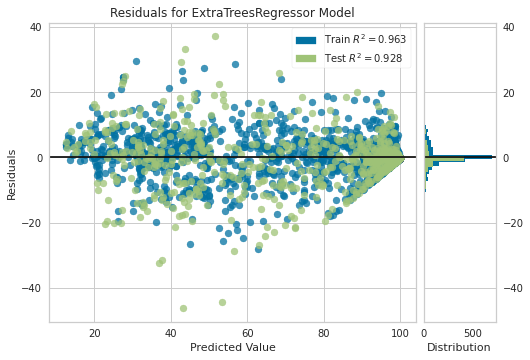

In [ ]:
plot_model(tuned_et, plot='residuals')

Next we made a plot showing real compared to predicted values.

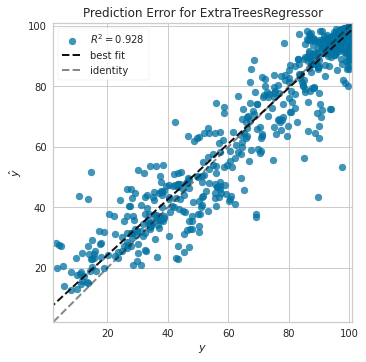

In [ ]:
plot_model(tuned_et, plot='error')

Finally we made a feature importance plot to see which metrics have the biggest influence on access to electricity.

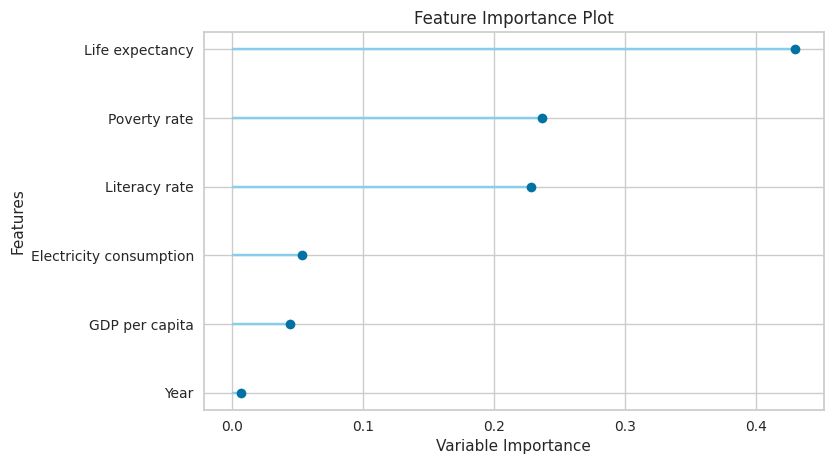

In [ ]:
plot_model(tuned_et, plot='feature')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a0a47cf0-a9e3-49d8-87cf-94e21f7b6042' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>